# **Music Genre Clustering using KMeans Clustering**
## Done by ***Shyam Sundhar G***

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('/content/Spotify-2000.csv')

In [37]:
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [39]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [40]:
df.isnull().sum()

,0
Index,0
Title,0
Artist,0
Top Genre,0
Year,0
Beats Per Minute (BPM),0
Energy,0
Danceability,0
Loudness (dB),0
Liveness,0


In [41]:
df.duplicated().sum()

0

In [42]:
df.drop('Index',axis=1,inplace=True)
df.head(5)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


<Axes: ylabel='Top Genre'>

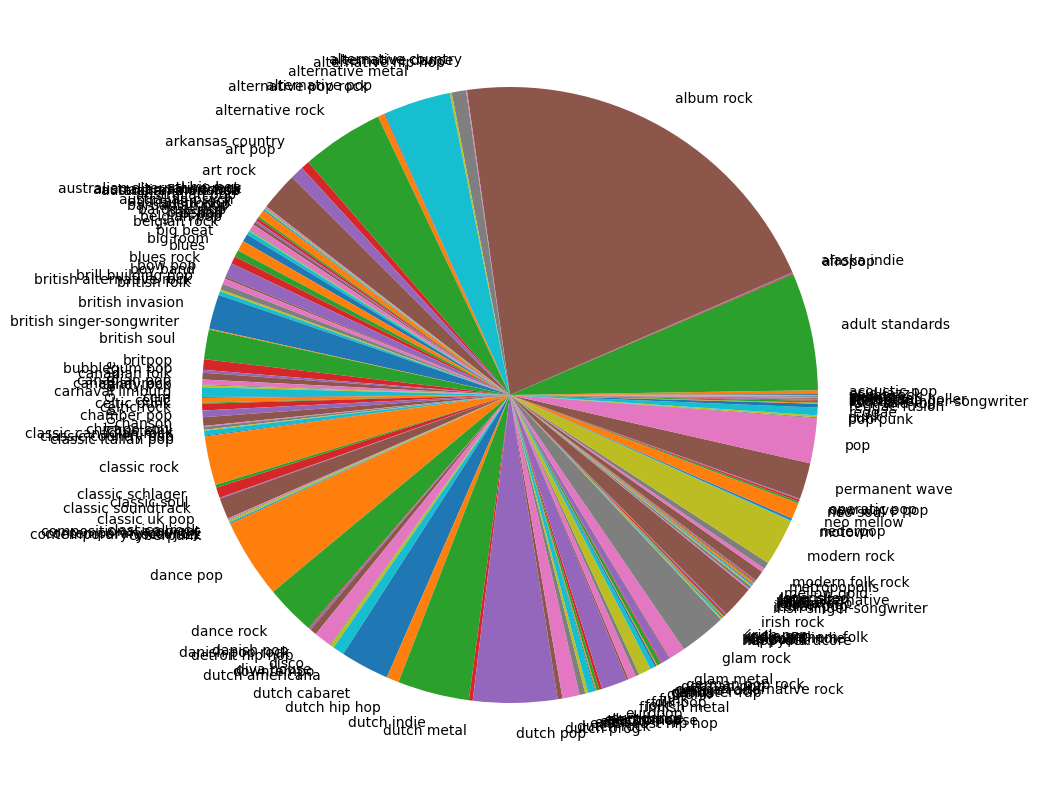

In [43]:
df.groupby('Top Genre')['Top Genre'].size().plot(kind='pie',figsize=(10,10))

<Axes: xlabel='Beats Per Minute (BPM)', ylabel='Density'>

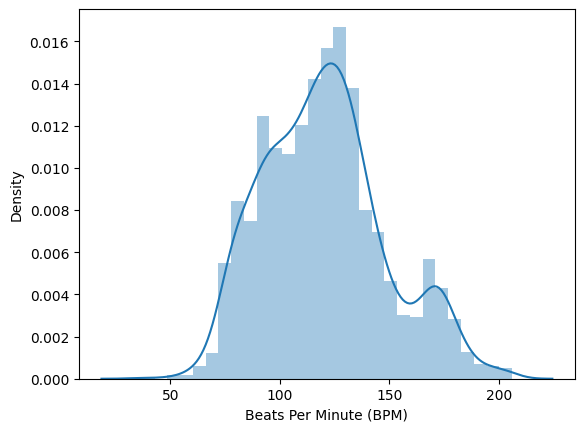

In [45]:
sns.distplot(df['Beats Per Minute (BPM)'])

<Axes: xlabel='Energy', ylabel='Density'>

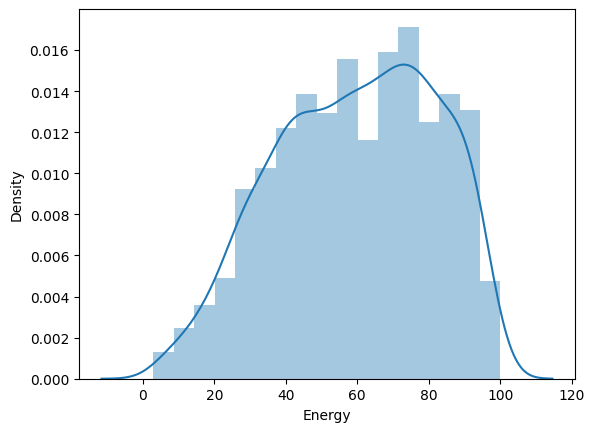

In [46]:
sns.distplot(df['Energy'])

<Axes: xlabel='Danceability', ylabel='Density'>

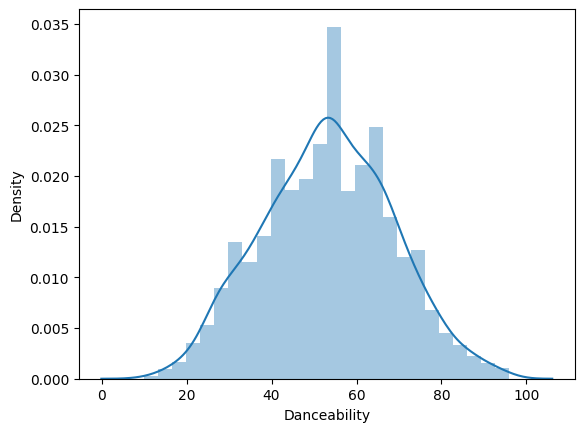

In [47]:
sns.distplot(df['Danceability'])

In [48]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [52]:
df1=df[['Beats Per Minute (BPM)','Energy','Danceability','Loudness (dB)','Liveness','Valence','Acousticness','Speechiness','Popularity']]
df1

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,68,94,3,71
1,135,79,50,-11,17,81,17,7,39
2,168,69,66,-9,7,52,2,17,69
3,173,96,43,-4,3,37,0,4,76
4,106,82,58,-5,10,87,1,3,59
...,...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,84,7,63
1990,175,76,36,-8,76,95,73,6,69
1991,168,80,53,-9,31,97,74,7,74
1992,174,26,45,-13,7,60,54,4,65


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Beats Per Minute (BPM)  1994 non-null   int64
 1   Energy                  1994 non-null   int64
 2   Danceability            1994 non-null   int64
 3   Loudness (dB)           1994 non-null   int64
 4   Liveness                1994 non-null   int64
 5   Valence                 1994 non-null   int64
 6   Acousticness            1994 non-null   int64
 7   Speechiness             1994 non-null   int64
 8   Popularity              1994 non-null   int64
dtypes: int64(9)
memory usage: 140.3 KB


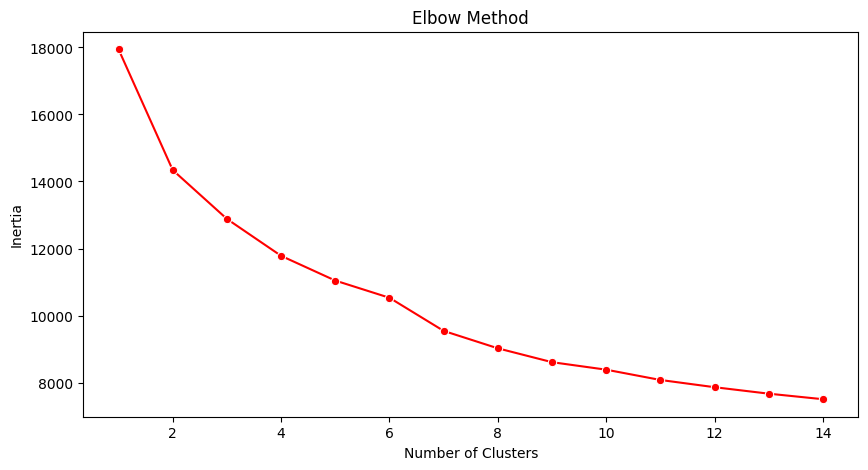

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df1)
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (10,5))
sns.lineplot(x = range(1,15), y = inertia, marker = 'o', color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [60]:
kmeans=KMeans(n_clusters=10)
cl=kmeans.fit_predict(df1)
df['Clusters']=cl
df['Clusters']=df['Clusters'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4',5:'Cluster 5',6:'Cluster 6',7:'Cluster 7',8:'Cluster 8',9:'Cluster 9'})
df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Clusters
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Cluster 3
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Cluster 9
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Cluster 5
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Cluster 5
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,Cluster 7
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,Cluster 6
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,Cluster 7
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,Cluster 3


In [63]:
import plotly.express as px

fig = px.scatter_3d(df, x='Energy', y='Danceability', z='Valence', color='Clusters', symbol='Clusters', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [69]:
print(df1.iloc[1])

Beats Per Minute (BPM)    135
Energy                     79
Danceability               50
Loudness (dB)             -11
Liveness                   17
Valence                    81
Acousticness               17
Speechiness                 7
Popularity                 39
Name: 1, dtype: int64


In [71]:
kmeans.predict([[135,79,50,-11,17,81,17,7,39]])

array([9], dtype=int32)

In [72]:
df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Clusters
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Cluster 3
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Cluster 9
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Cluster 5
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Cluster 5
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,Cluster 7
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,Cluster 6
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,Cluster 7
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,Cluster 3


<Axes: ylabel='Clusters'>

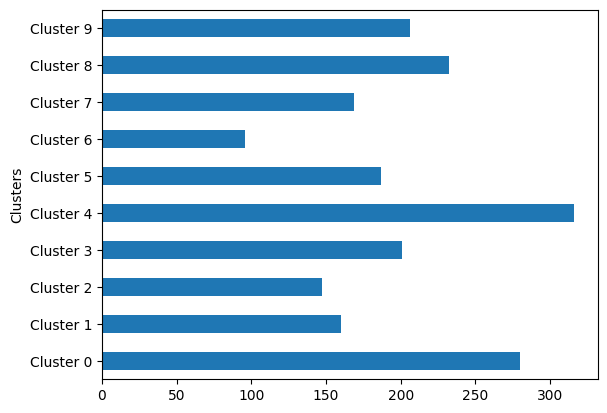

In [73]:
df.groupby('Clusters').size().plot(kind='barh')